# Pytorch Performance Evaluation
In this project I created a neuronal network with pytorch. It has forward and backward propagation and can calculate the performance together with loss and execution time for different activation functions.
Now we are evaluating the output of the neuronal network trainings.

In this case all scenarios were trained in 100 epochs.

In [40]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# load latest Performance File
folder_path = "./output/"
files = glob.glob(os.path.join(folder_path, "*.csv"))
if not files:
    raise FileNotFoundError("No CSV files found in the folder.")

latest_file = max(files, key=os.path.getmtime)
df_performance = pd.read_csv(latest_file)

print(f"Loaded file: {latest_file}")
print(f"Shape: {df_performance.shape}")
df_performance.sort_values("Test Accuracy", ascending=False).head(10)

Loaded file: ./output\2025-03-07 15-25_performance.csv
Shape: (40, 6)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy
14,0.0010,LeakyReLu-0.1,0.0008,66.35,100.000000,95.05
12,0.0010,LeakyReLu-0.01,0.0006,66.03,99.612452,94.60
13,0.0010,LeakyReLu-0.05,0.0003,65.95,99.974997,94.20
15,0.0010,LeakyReLu-0.5,0.0007,65.93,100.000000,93.95
22,0.0001,LeakyReLu-0.01,0.0220,66.39,98.362295,93.15
24,0.0001,LeakyReLu-0.1,0.0593,65.70,98.462308,92.80
29,0.0001,ELU-0.03,0.0463,89.14,98.537317,92.10
23,0.0001,LeakyReLu-0.05,0.0094,65.95,97.912239,91.95
25,0.0001,LeakyReLu-0.5,0.0202,65.32,99.662458,91.80
20,0.0001,ReLU,0.2283,65.29,96.449556,90.70


# Evaluation Visualizations

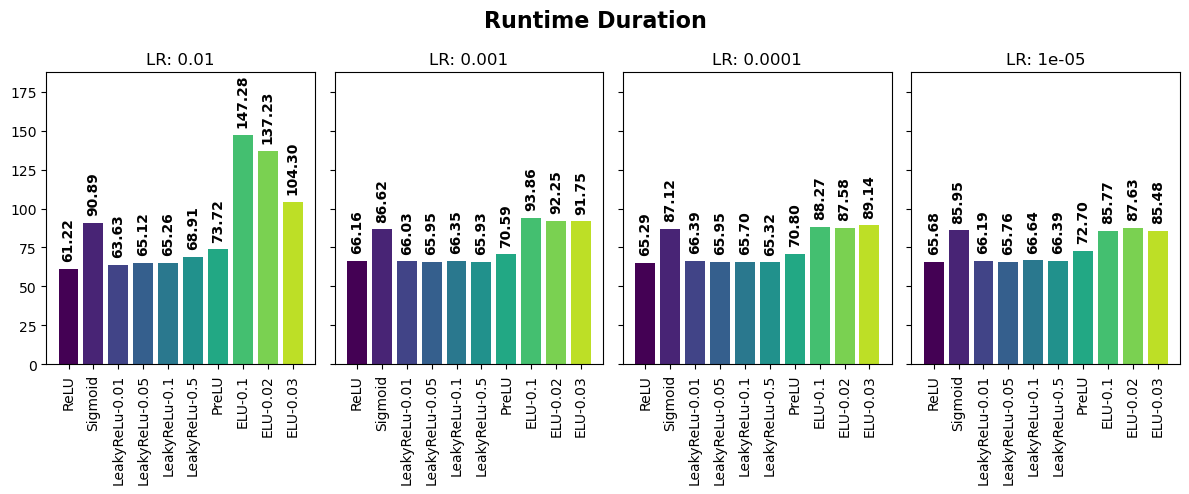

In [127]:
# Runtime duration

# data prep
activation_functions = df_performance["Activation Function"].unique()
learning_rates = df_performance["Learning Rate"].unique()

# Color map
cmap = plt.get_cmap("viridis")
color_dict = {func: cmap(i / len(activation_functions)) for i, func in enumerate(activation_functions)}

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates), figsize=(12, 5), sharey=True)
fig.suptitle("Runtime Duration", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates):
    subset = df_performance[df_performance["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    durations = subset["Duration"]
    
    bars = ax.bar(subset["Activation Function"], durations, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, duration in zip(bars, durations):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{duration:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, max(durations) + 100)
    
plt.tight_layout()
plt.show()

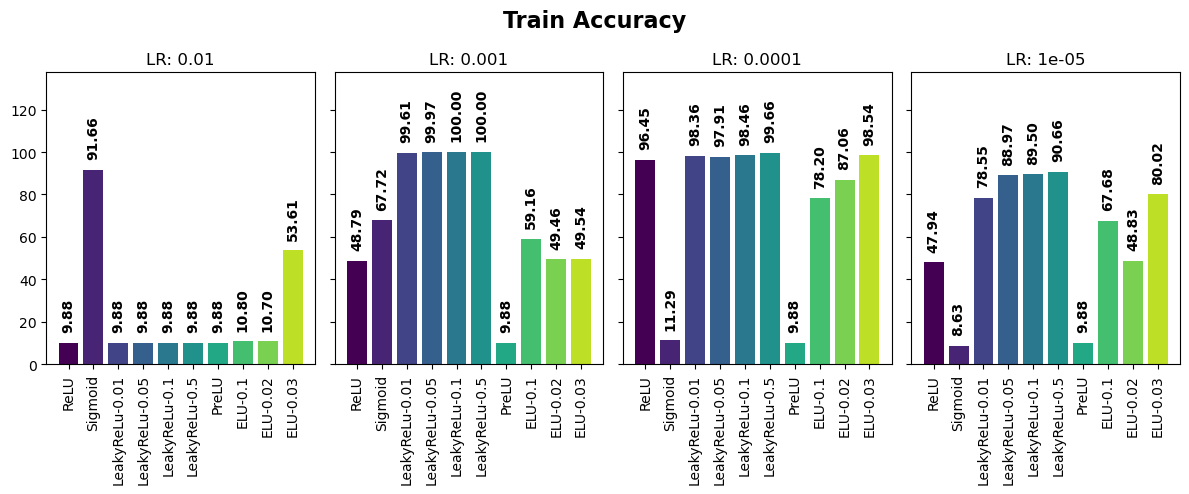

In [133]:
# Train accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates), figsize=(12, 5), sharey=True)
fig.suptitle("Train Accuracy", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates):
    subset = df_performance[df_performance["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    train_accuracy = subset["Train Accuracy"]
    
    bars2 = ax.bar(subset["Activation Function"], train_accuracy, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, accuracy in zip(bars2, train_accuracy):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{accuracy:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, max(durations) + 50)
    
plt.tight_layout()
plt.show()

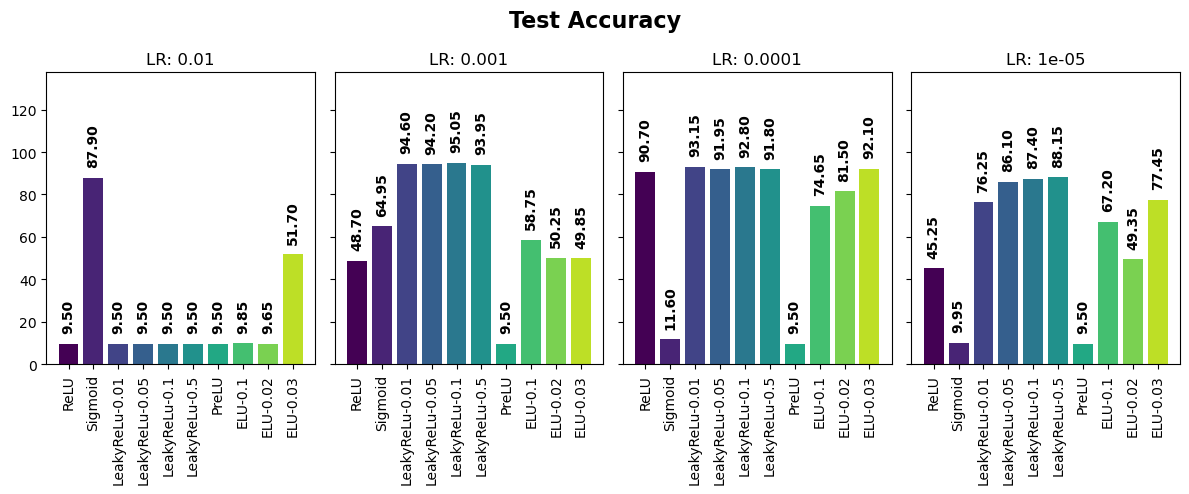

In [139]:
# Test accuracy

fig, axes = plt.subplots(1, len(learning_rates), figsize=(12, 5), sharey=True)
fig.suptitle("Test Accuracy", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates):
    subset = df_performance[df_performance["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    test_accuracy = subset["Test Accuracy"]
    
    bars3 = ax.bar(subset["Activation Function"], test_accuracy, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, test_accuracy in zip(bars3, test_accuracy):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{test_accuracy:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, max(durations) + 50)
    
plt.tight_layout()
plt.show()

# Summary
In this evaluation we tested the activation function of th eNN with different learning rates for 100 epochs to find the best performance, which was given by the LeakyReLU variants.

For further testing we can
- increase the number of epochs for teh smaller learning rates
- change the hidden layer
- add further hidden layers
- use ADAM or other optimization algorithms

There are multiple options left to increase teh accuray for this NN.